In [1]:
#import needed libraries
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read the data user_day
df1=pd.read_csv('C:\\Users\\Snow\\Desktop\\sa_data_test\\user_day.csv', encoding='utf-8-sig', engine='python')
df1.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.00,0.00,My Lovely Horse
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.00,0.00,My Lovely Horse
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.00,0.00,My Lovely Horse
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.00,0.00,My Lovely Horse
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.00,0.00,My Lovely Horse


In [3]:
#read the data user_cpi
df2=pd.read_csv('C:\\Users\\Snow\\Desktop\\sa_data_test\\user_cpi.csv', encoding='utf-8-sig', engine='python')
df2.head()

,player_id,install_date,network_name,cpi,game
0,d4286141ab6790c14d251382eb097109,2019-08-02,Paid,0.26,My Lovely Horse
1,c16fc8f72badd29b315e7370fdf17dd3,2019-08-02,Organic,0.00,My Lovely Horse
2,ac5cbf1db218c7e4f3149c3318e62164,2019-08-02,Paid,0.26,My Lovely Horse
3,4fb68261bd7aa4750895aafd98db3920,2019-08-02,Paid,0.26,My Lovely Horse
4,d77e12b5b9117106c826fd094f7d6096,2019-08-02,Paid,0.26,My Lovely Horse


In [4]:
#merge the dataframes 
frames = [df1, df2]
df3= pd.merge(df1, df2, how="left", on=["player_id", "game"])
df3.head()

,player_id,event_date,iap_revenue,video_ad_revenue,game,install_date,network_name,cpi
0,50d748fba4686b14ddbf8e46ea46ba30,2019-09-15,0.00,0.00,My Lovely Horse,2019-09-15,Organic,0.00
1,e67ecdc1d0adfb8de7da517b46feb8aa,2019-08-02,0.00,0.00,My Lovely Horse,2019-08-02,Paid,0.26
2,8b418e775f81eae382acc0b5ca53e12e,2019-08-05,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00
3,8b418e775f81eae382acc0b5ca53e12e,2019-08-08,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00
4,8b418e775f81eae382acc0b5ca53e12e,2019-08-09,0.00,0.00,My Lovely Horse,2019-08-05,Organic,0.00


In [5]:
#select 'My Lovely Horse' game data
df4=df3.loc[df3['game'] == 'My Lovely Horse']
df4.sample(5)

,player_id,event_date,iap_revenue,video_ad_revenue,game,install_date,network_name,cpi
843342,a16d4c9c96595e33877b7e2181e2b8bd,2019-09-06,0.00,0.00,My Lovely Horse,2019-08-30,Organic,0.00
367666,ce8bc2e3ed8967a198d1b5ddf203453a,2019-09-08,0.00,0.00,My Lovely Horse,2019-08-31,Paid,0.00
579867,c4ff837c413b990642dd04602d7715ff,2019-09-06,0.00,0.00,My Lovely Horse,2019-08-20,Organic,0.00
367175,a72879768cd5754471af594fd3350684,2019-09-20,0.00,0.00,My Lovely Horse,2019-09-20,Paid,0.31
647316,ce7be8b45c59b37a370cd455fc7fe008,2019-10-02,0.00,0.00,My Lovely Horse,2019-09-30,Paid,0.15


In [6]:
#check data type and size
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1034315 entries, 0 to 1034314
Data columns (total 8 columns):
player_id           1034315 non-null object
event_date          1034315 non-null object
iap_revenue         1034315 non-null float64
video_ad_revenue    1034315 non-null float64
game                1034315 non-null object
install_date        1034315 non-null object
network_name        1034315 non-null object
cpi                 1034315 non-null float64
dtypes: float64(3), object(5)
memory usage: 71.0+ MB


In [7]:
#check numerical fields
df4.describe()

,iap_revenue,video_ad_revenue,cpi
count,"1,034,315.00","1,034,315.00","1,034,315.00"
mean,0.06,0.00,0.25
std,1.18,0.00,0.79
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,0.00
75%,0.00,0.00,0.22
max,424.35,0.00,8.60


In [8]:
#check categorical fields
df4_categorical=df4.select_dtypes(include=['object']).copy()
print(df4_categorical.describe())

                               player_id  event_date             game  \
count                            1034315     1034315          1034315   
unique                            328075          91                1   
top     ad94bd4659553b76c514f38d77ac35a5  2019-08-04  My Lovely Horse   
freq                                  90       31964          1034315   

       install_date network_name  
count       1034315      1034315  
unique           91            2  
top      2019-08-03      Organic  
freq          68210       577527  


In [9]:
#create cohorts based on install_date 
grouped = df4.groupby(['install_date','event_date'])
cohorts = grouped.agg({'player_id': pd.Series.nunique})
cohorts.rename(columns={'player_id': 'TotalUsers'}, inplace=True)
cohorts.head()

TotalUsers
install_date event_date            
2019-08-02   2019-08-02       18841
             2019-08-03        7901
             2019-08-04        4297
             2019-08-05        2720
             2019-08-06        2094

In [10]:
#Create a `CohortPeriod` column, which is the Nth period based on the user's login date.
def cohort_period(df4):
    df4['CohortPeriod'] = np.arange(len(df4)) 
    return df4

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  CohortPeriod
install_date event_date                          
2019-08-02   2019-08-02       18841             0
             2019-08-03        7901             1
             2019-08-04        4297             2
             2019-08-05        2720             3
             2019-08-06        2094             4

In [11]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['install_date', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

install_date
2019-08-02    18841
2019-08-03    21268
2019-08-04    18692
2019-08-05    13294
2019-08-06    11802
Name: TotalUsers, dtype: int64

In [12]:
cohorts['TotalUsers'].head()

install_date  CohortPeriod
2019-08-02    0               18841
              1                7901
              2                4297
              3                2720
              4                2094
Name: TotalUsers, dtype: int64

In [13]:
cohorts['TotalUsers'].unstack(1).head()

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
install_date,,,,,,,,,,,,,,,,,,,,,
2019-08-02,"18,841.00","7,901.00","4,297.00","2,720.00","2,094.00","1,704.00","1,502.00","1,474.00","1,348.00","1,158.00",...,56.00,55.00,49.00,72.00,60.00,55.00,50.00,51.00,31.00,42.00
2019-08-03,"21,268.00","8,975.00","4,362.00","3,138.00","2,444.00","2,130.00","2,183.00","2,087.00","1,721.00","1,272.00",...,66.00,68.00,76.00,89.00,80.00,70.00,72.00,61.00,58.00,nan
2019-08-04,"18,692.00","6,907.00","4,140.00","2,972.00","2,493.00","2,419.00","2,165.00","1,821.00","1,307.00","1,035.00",...,69.00,62.00,74.00,78.00,66.00,70.00,53.00,56.00,nan,nan
2019-08-05,"13,294.00","5,495.00","3,196.00","2,337.00","1,902.00","1,524.00","1,228.00",940.00,853.00,733.00,...,38.00,47.00,43.00,47.00,31.00,32.00,35.00,nan,nan,nan
2019-08-06,"11,802.00","4,910.00","2,984.00","2,166.00","1,689.00","1,272.00","1,007.00",847.00,749.00,597.00,...,29.00,31.00,35.00,22.00,22.00,29.00,nan,nan,nan,nan


In [14]:
#create user retention rates
user_retention = cohorts['TotalUsers'].unstack(1).divide(cohort_group_size, axis=0)
user_retention.head()

CohortPeriod,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
install_date,,,,,,,,,,,,,,,,,,,,,
2019-08-02,1.00,0.42,0.23,0.14,0.11,0.09,0.08,0.08,0.07,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2019-08-03,1.00,0.42,0.21,0.15,0.11,0.10,0.10,0.10,0.08,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan
2019-08-04,1.00,0.37,0.22,0.16,0.13,0.13,0.12,0.10,0.07,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan
2019-08-05,1.00,0.41,0.24,0.18,0.14,0.11,0.09,0.07,0.06,0.06,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan
2019-08-06,1.00,0.42,0.25,0.18,0.14,0.11,0.09,0.07,0.06,0.05,...,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan


In [15]:
user_retention.to_excel (r'C:\Users\Snow\Desktop\sa_data_test\MyLovelyHorse.xlsx', index = True, header=True)

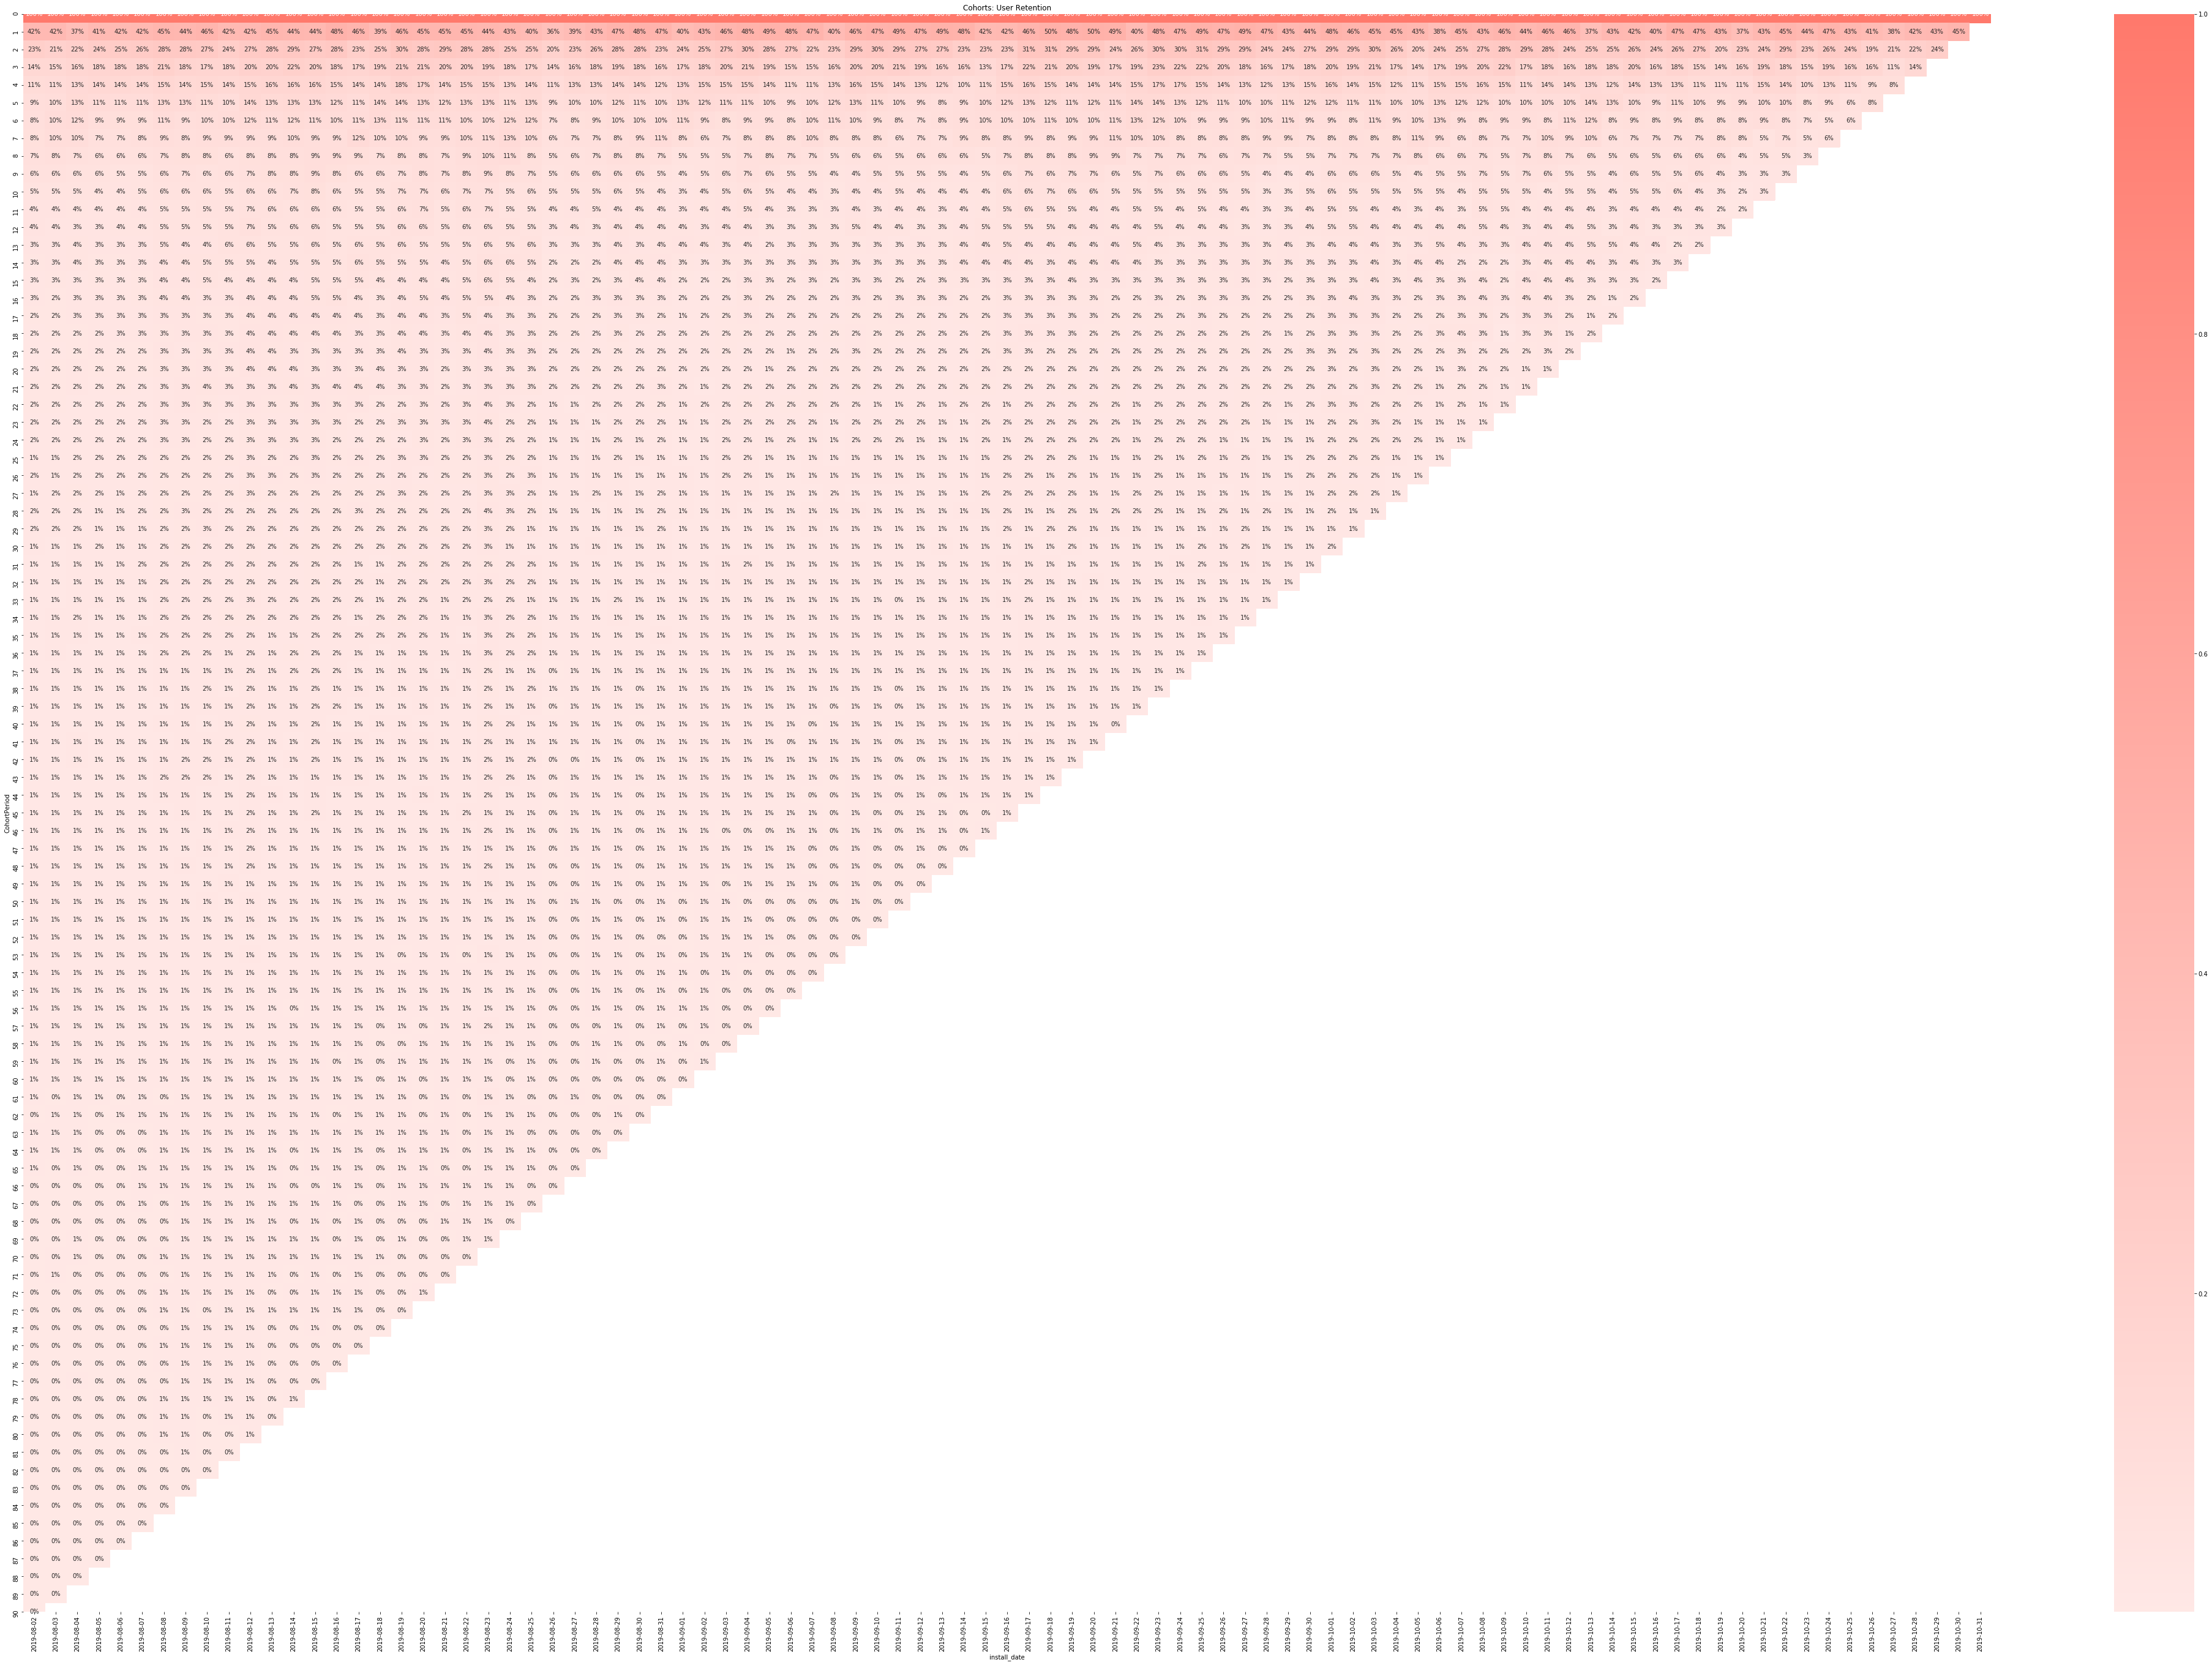

In [16]:
#show the retention rates
import seaborn as sns
colormap=sns.light_palette("#ff796c",as_cmap=True, reverse=False)

plt.figure(figsize=(72,48))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%',cmap=colormap);